In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ks=pd.read_csv('kickstarter_data.csv')
ks.head(50)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,2009
6,830477146,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed,2009
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful,2009
8,1502297238,Produce a Play (Canceled),Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled,2009
9,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed,2009


In [3]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371581 entries, 0 to 371580
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           371581 non-null  int64 
 1   Name         371581 non-null  object
 2   Category     371581 non-null  object
 3   Subcategory  371581 non-null  object
 4   Country      371581 non-null  object
 5   Launched     371581 non-null  object
 6   Deadline     371581 non-null  object
 7   Goal         371581 non-null  int64 
 8   Pledged      371581 non-null  int64 
 9   Backers      371581 non-null  int64 
 10  State        371581 non-null  object
 11  Year         371581 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 34.0+ MB


In [4]:
ks['Deadline']=ks['Deadline'].apply(pd.to_datetime)

In [5]:
pd.DataFrame({'count':ks.shape[0],
             'null':ks.isnull().sum(),
             'null%':ks.isnull().mean()*100,
             'cardinality':ks.nunique()  
    
})

,count,null,null%,cardinality
ID,371581,0,0.0,371581
Name,371581,0,0.0,368829
Category,371581,0,0.0,15
Subcategory,371581,0,0.0,159
Country,371581,0,0.0,22
Launched,371581,0,0.0,371029
Deadline,371581,0,0.0,3102
Goal,371581,0,0.0,27457
Pledged,371581,0,0.0,39855
Backers,371581,0,0.0,3951


In [6]:
ks.duplicated().any()

False

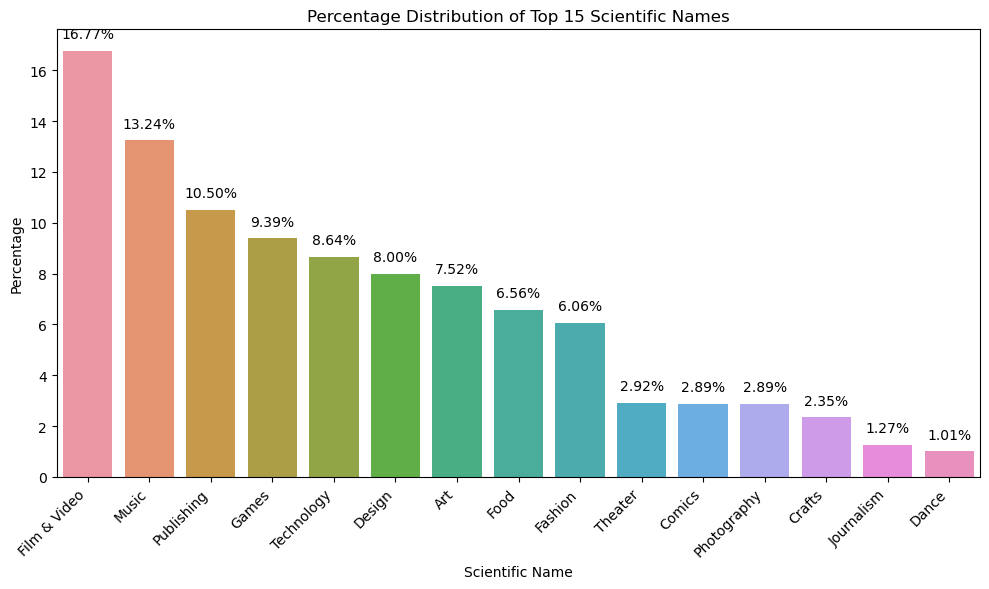

In [8]:
percentage_ks = (ks['Category'].value_counts() / len(ks)) * 100

top_15 = percentage_ks.nlargest(15)

plt.figure(figsize=(10, 6))  
sns.barplot(x=top_15.index, y=top_15.values)

for index, value in enumerate(top_15):
    plt.text(index, value + 0.5, f'{value:.2f}%',ha='center')
    
plt.xlabel('Scientific Name')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Top 15 Scientific Names')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

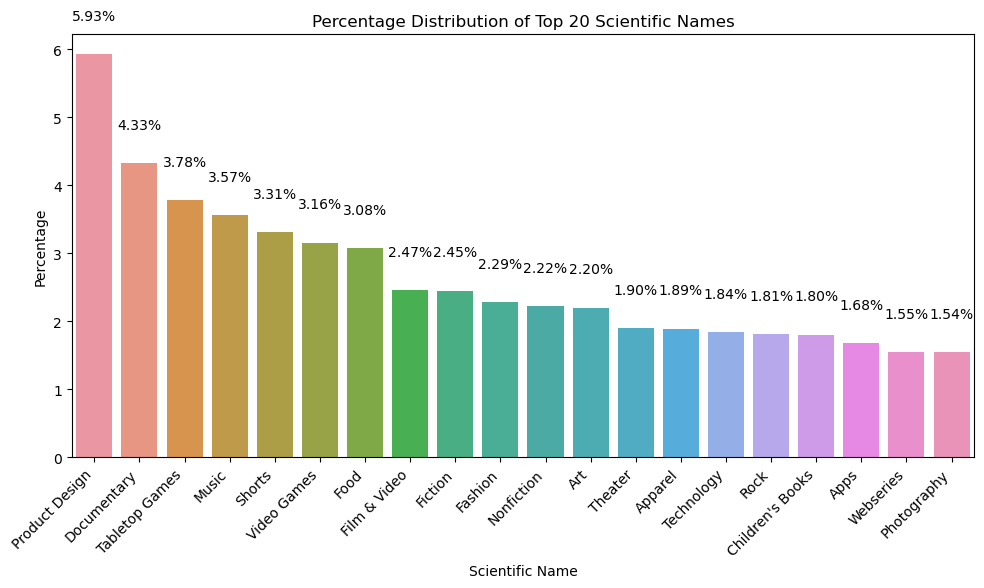

In [9]:
percentage_ks = (ks['Subcategory'].value_counts() / len(ks)) * 100
top_20 = percentage_ks.nlargest(20)

plt.figure(figsize=(10, 6))  
sns.barplot(x=top_20.index, y=top_20.values)

for index, value in enumerate(top_20):
    plt.text(index, value + 0.5, f'{value:.2f}%',ha='center')

plt.xlabel('Scientific Name')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Top 20 Scientific Names')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

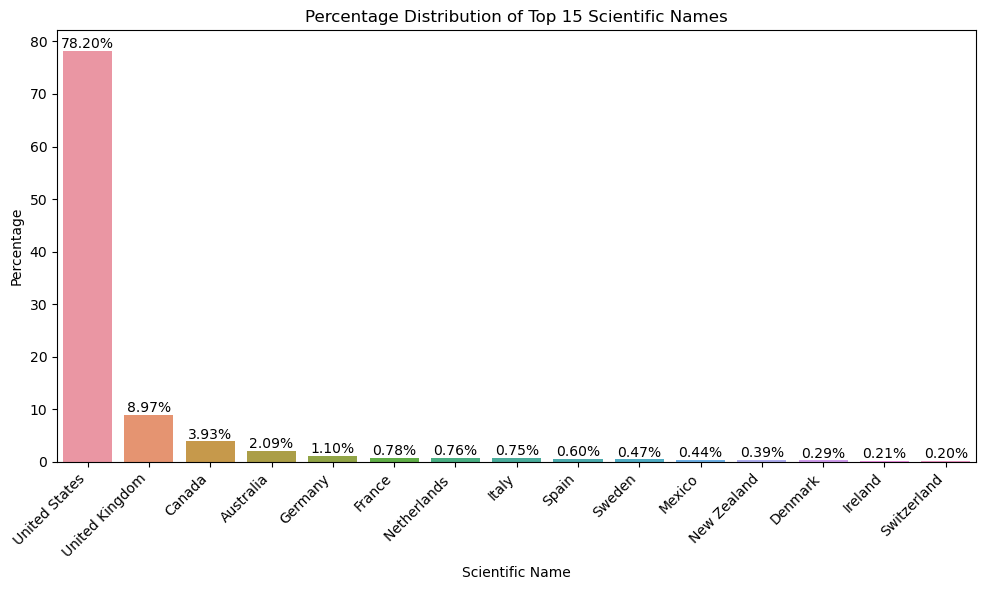

In [11]:
percentage_ks = (ks['Country'].value_counts() / len(ks)) * 100
top_12 = percentage_ks.nlargest(15)

plt.figure(figsize=(10, 6))  
sns.barplot(x=top_12.index, y=top_12.values)

for index, value in enumerate(top_12):
    plt.text(index, value + 0.5, f'{value:.2f}%',ha='center')

plt.xlabel('Scientific Name')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Top 15 Scientific Names')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

In [12]:
successful = ks[(ks['Goal'] >= 1000) & (ks['State'] == 'Successful')]
successful

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,2009
11,515267366,Crossword Puzzles!,Games,Puzzles,United States,2009-04-29 13:52:03,2009-06-30,1500,2265,163,Successful,2009
17,1304906577,Accidental to Edinburgh - PHASE 1: AIRFARE,Theater,Theater,United States,2009-04-30 22:22:43,2009-06-05,6000,6575,24,Successful,2009
18,1801448924,Accidental to Edinburgh - PHASE 1: REBUILDING ...,Theater,Theater,United States,2009-04-30 22:23:22,2009-07-15,10000,10145,27,Successful,2009
21,405307432,Electronola - An electronic gumbo of New Orlea...,Music,Electronic Music,United States,2009-05-01 17:44:25,2009-06-05,4000,4101,114,Successful,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
371551,1232303453,Empowering Youth Through Photography & Videogr...,Photography,People,United States,2017-12-13 01:15:02,2017-12-24,1000,1030,10,Successful,2017
371557,993249553,1st Annual Brian Kesinger Christmas Ornament,Art,Art,United States,2017-12-14 09:01:39,2017-12-15,1000,9244,59,Successful,2017
371558,1981614001,Aradia Miniatures - Arktikos: Northern Lights,Games,Tabletop Games,Switzerland,2017-12-14 11:47:59,2017-12-24,3075,6696,78,Successful,2017
371561,503265734,Wolf Like Me 2.0,Food,Drinks,Canada,2017-12-14 19:44:37,2017-12-24,7974,9908,38,Successful,2017


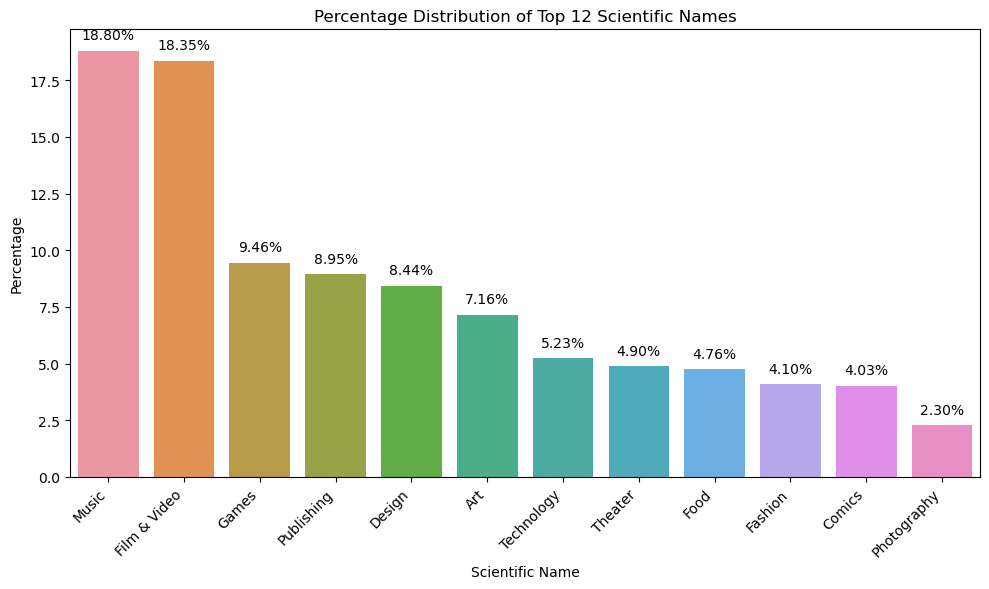

In [13]:
percentage_ks = (successful['Category'].value_counts() / len(successful)) * 100

top_12 = percentage_ks.nlargest(12)

plt.figure(figsize=(10, 6))  
sns.barplot(x=top_12.index, y=top_12.values)

for index, value in enumerate(top_12):
    plt.text(index, value + 0.5, f'{value:.2f}%',ha='center')

plt.xlabel('Scientific Name')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Top 12 Scientific Names')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

In [14]:
failed = ks[(ks['Goal'] >= 1000) & (ks['State'] == 'Failed')]
failed

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009
20,1578671837,Support casting my sculpture in bronze,Art,Sculpture,United States,2009-05-01 14:22:21,2009-05-31,2000,25,1,Failed,2009
32,748946786,Dollar Van Demos,Film & Video,Documentary,United States,2009-05-06 03:50:19,2009-06-01,2000,100,1,Failed,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
371563,1498748922,Tabler art,Art,Art,United States,2017-12-15 02:57:18,2017-12-31,7500,280,6,Failed,2017
371564,2083625005,Sailor Moon Sailor Senshi Enamel Pin Kickstarter,Art,Illustration,Canada,2017-12-15 20:39:21,2017-12-31,1679,930,31,Failed,2017
371567,1023854765,"Longlasting, Durable, Wood Toys, Games, Furnit...",Crafts,Woodworking,United States,2017-12-16 11:49:35,2017-12-28,1800,95,4,Failed,2017
371572,1705137357,Center Touching Center - A Book of Poetry,Publishing,Publishing,United States,2017-12-19 04:10:24,2017-12-28,3700,0,0,Failed,2017


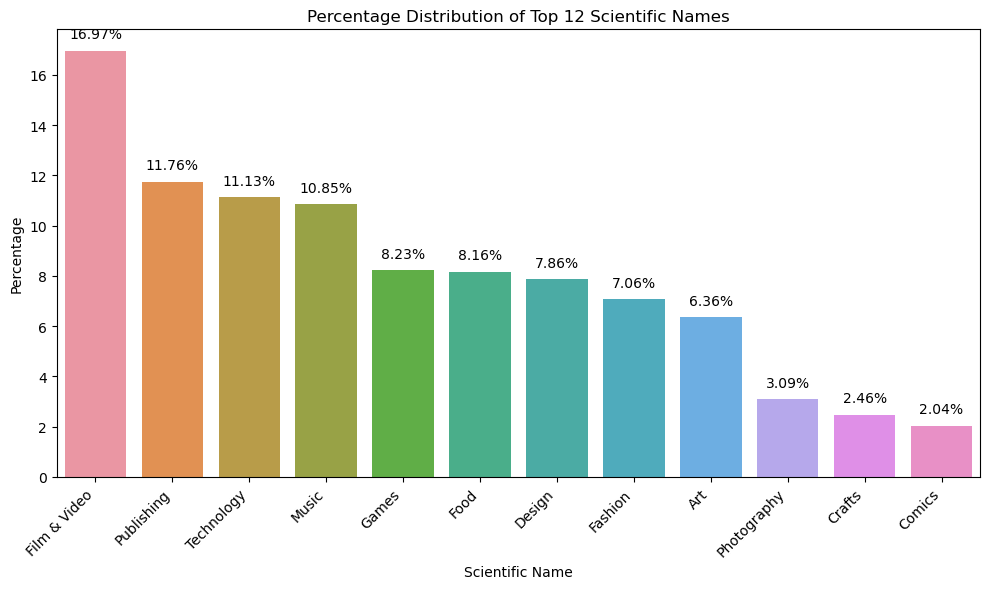

In [15]:
percentage_ks = (failed['Category'].value_counts() / len(failed)) * 100

top_12 = percentage_ks.nlargest(12)

plt.figure(figsize=(10, 6))  
sns.barplot(x=top_12.index, y=top_12.values)

for index, value in enumerate(top_12):
    plt.text(index, value + 0.5, f'{value:.2f}%',ha='center')

plt.xlabel('Scientific Name')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Top 12 Scientific Names')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

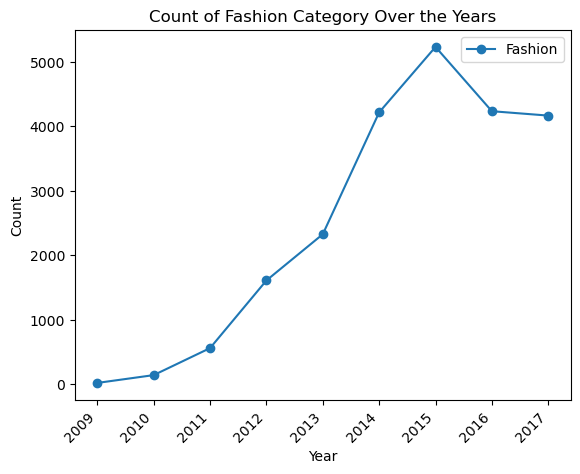

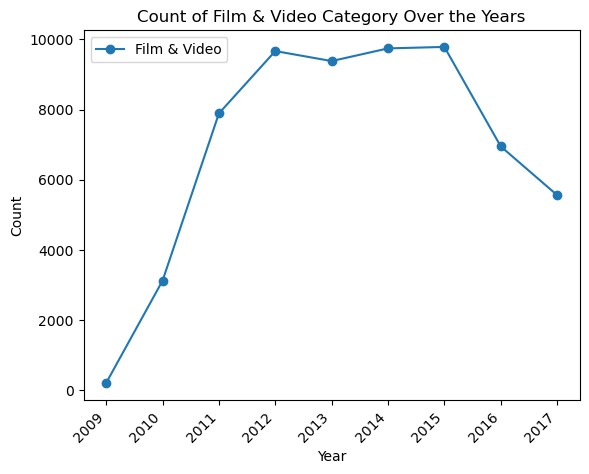

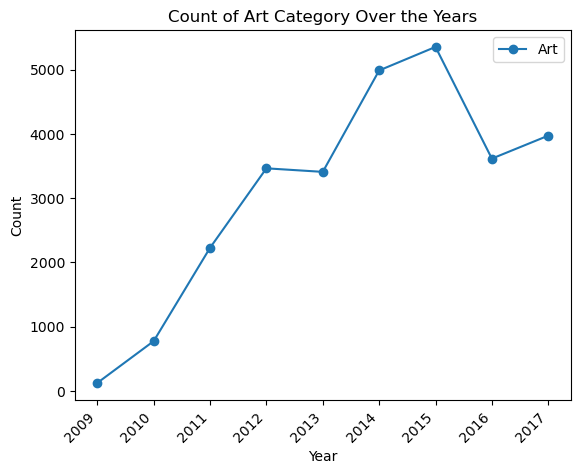

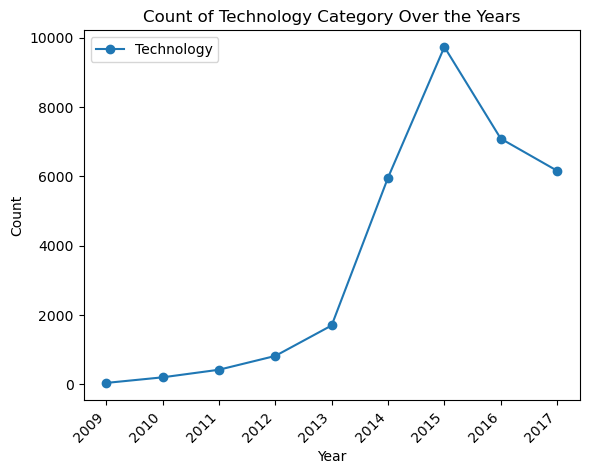

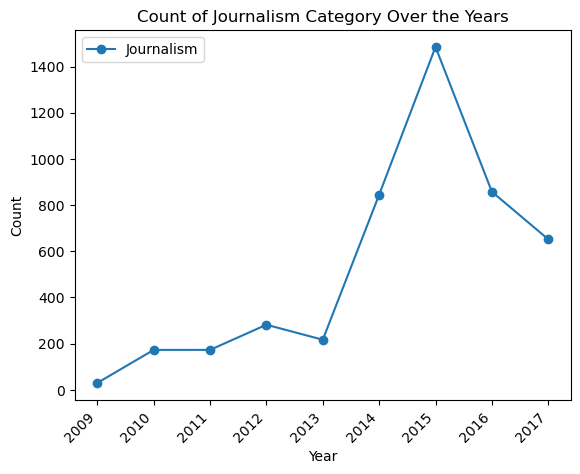

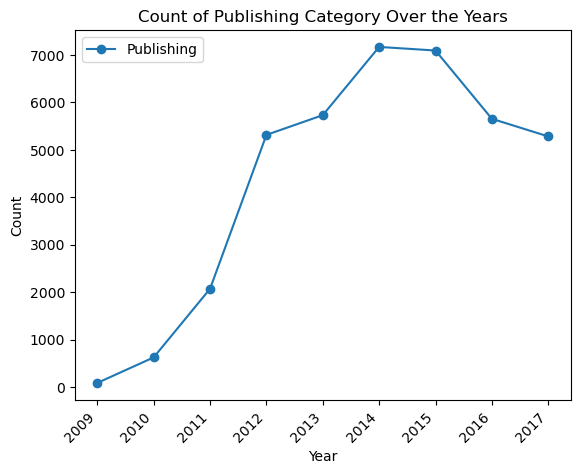

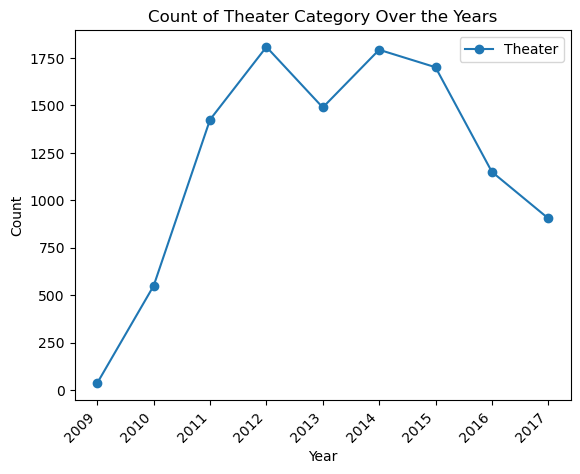

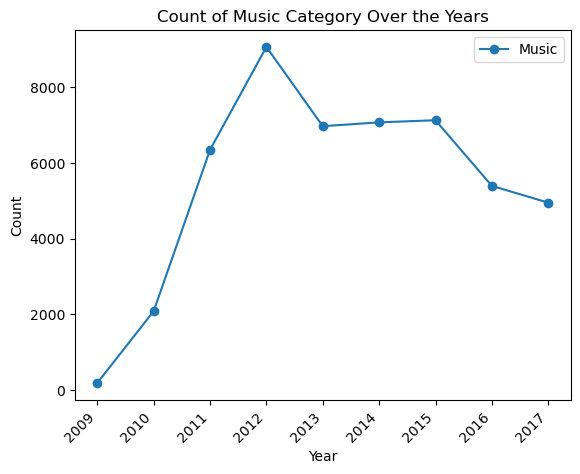

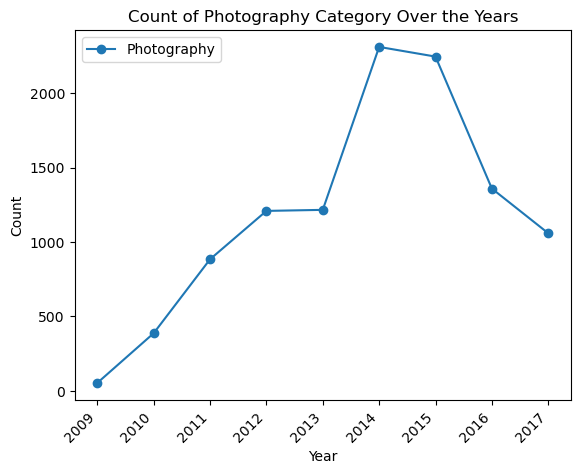

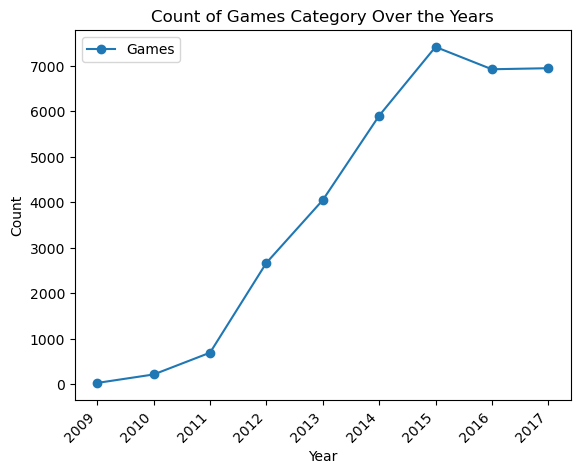

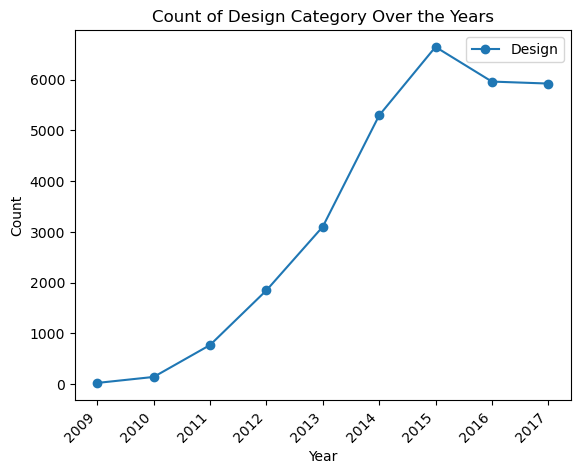

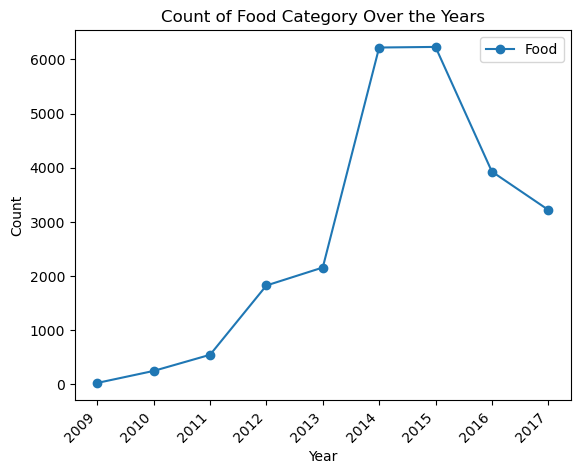

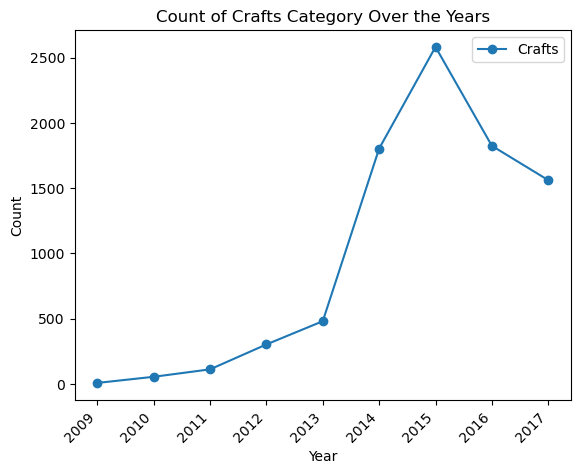

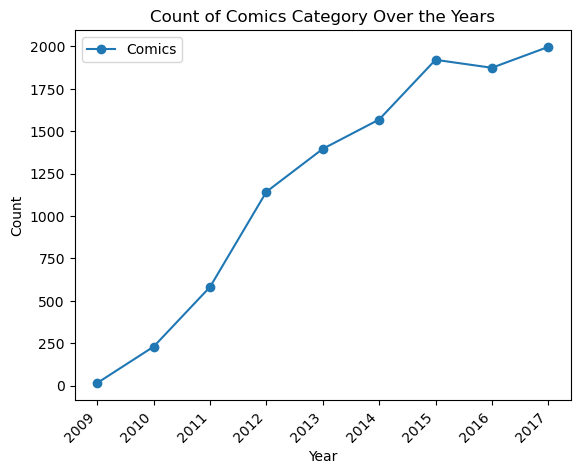

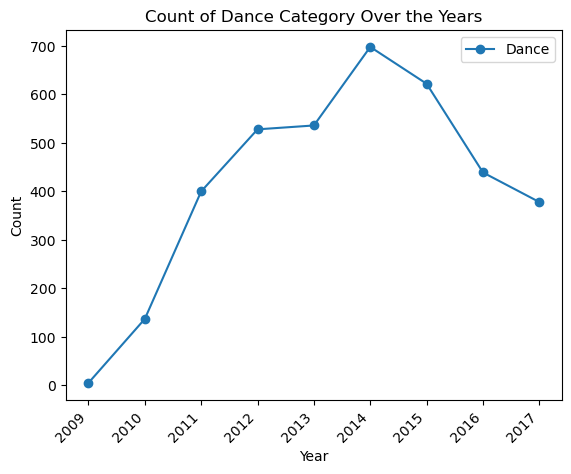

In [17]:
ks['Year'] = pd.to_datetime(ks['Deadline']).dt.year

unique_categories = ks['Category'].unique()

for category in unique_categories:
    product_df = ks[ks['Category'] == category]
  
    product_counts = product_df.groupby('Year').size()

    plt.plot(product_counts.index, product_counts.values, marker='o', linestyle='-', label=category)

    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Count of {category} Category Over the Years')
    plt.xticks(product_counts.index, rotation=45, ha='right')
    plt.legend()
    plt.show()